In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/AndhraPradesh1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,16,21.978556,936.352661,71.490068,110.560279,3.608265
131396,2014,12,31,20,0,0,0,0,0,0,0,16,21.479383,936.720520,75.049659,124.306187,3.618451
131397,2014,12,31,21,0,0,0,0,0,0,0,17,20.939624,936.738586,79.410245,138.093203,3.455779
131398,2014,12,31,22,0,0,0,0,0,0,0,17,20.557559,936.552063,83.143147,151.731824,3.287697


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed,Date
0,2000,1,1,0,0,0,0,0,0,0,0,20,20.736232,937.309814,97.636380,171.103614,1.820233,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,20,20.547621,936.590149,97.764840,162.082357,1.616232,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,20,20.405927,936.324219,98.032320,148.957279,1.382257,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,20.305098,936.155273,98.152521,135.256602,1.173256,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,19,20.266761,936.478088,98.132011,121.461475,0.998815,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,13,13.790353,939.899292,98.876405,107.660610,2.971705,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,13,14.254964,940.688599,93.838127,94.123193,2.779415,2000-01-01 06:00:00
7,2000,1,1,7,0,59,316,109,59,316,109,13,15.892355,941.445618,86.837310,80.913256,2.547579,2000-01-01 07:00:00
8,2000,1,1,8,0,110,602,333,110,602,333,14,18.137191,942.006470,80.201618,68.258226,2.482057,2000-01-01 08:00:00
9,2000,1,1,9,0,138,740,547,138,740,547,14,21.422234,941.736328,66.567218,56.554706,2.902531,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2014-12-27,526.6
2014-12-28,370.0
2014-12-29,480.1


In [8]:
X

,Date,GHI
0,2000-01-01 08:00:00,333
1,2000-01-01 09:00:00,547
2,2000-01-01 10:00:00,714
3,2000-01-01 11:00:00,818
4,2000-01-01 12:00:00,797
...,...,...
54745,2014-12-31 13:00:00,766
54746,2014-12-31 14:00:00,572
54747,2014-12-31 15:00:00,313
54748,2014-12-31 16:00:00,199


In [9]:
y[:4380]

,GHI
Date,
2000-01-01,549.9
2000-01-02,558.1
2000-01-03,507.1
2000-01-04,554.1
2000-01-05,554.7
...,...
2011-12-27,473.6
2011-12-28,526.6
2011-12-29,523.8


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
type(y)

pandas.core.frame.DataFrame

In [12]:
X_T=[]
X=X.loc[:,'GHI']
X=X.values

for i in range(0,54750,10):
  X_add = X[i:i+10]
  #print(i,j)
  X_T.append(X_add)
  
X_T=np.asarray(X_T)
X_T.shape

(5475, 10)

In [13]:
X_T

array([[333, 547, 714, ..., 500, 282,  54],
       [332, 545, 713, ..., 504, 286,  56],
       [331, 537, 692, ..., 486, 274,  54],
       ...,
       [307, 506, 671, ..., 323, 102,  24],
       [309, 513, 676, ..., 447, 219,  40],
       [312, 491, 682, ..., 313, 199,  42]])

In [14]:
Y_T=y.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(5475,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
  
# fit model
model.fit(X_T[:4380], Y_T[:4380], epochs=2000, verbose=0)


In [16]:
# demonstrate prediction
yhat=[]


for i in range(4380,5475):
  x_input = X_T[i]
  x_input = x_input.reshape(1,10)
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[525.8902]]
[[553.9807]]
[[555.7807]]
[[559.4811]]
[[559.8813]]
[[481.2572]]
[[569.68146]]
[[585.6819]]
[[574.7818]]
[[561.7779]]
[[447.50998]]
[[473.0004]]
[[513.2893]]
[[584.383]]
[[596.686]]
[[594.585]]
[[606.0832]]
[[603.28314]]
[[596.7834]]
[[586.68335]]
[[593.38324]]
[[606.9836]]
[[602.884]]
[[609.18396]]
[[615.9847]]
[[611.388]]
[[619.28705]]
[[528.5847]]
[[540.0945]]
[[615.5774]]
[[623.28723]]
[[593.88367]]
[[597.8834]]
[[612.18475]]
[[613.7874]]
[[619.1846]]
[[624.6849]]
[[612.8849]]
[[614.2863]]
[[619.4845]]
[[581.77155]]
[[580.1778]]
[[618.08435]]
[[624.6845]]
[[643.58466]]
[[593.90533]]
[[642.6845]]
[[622.8917]]
[[660.8847]]
[[664.587]]
[[658.4847]]
[[664.1829]]
[[666.3852]]
[[663.58484]]
[[659.0858]]
[[673.3841]]
[[679.2839]]
[[686.08136]]
[[688.8827]]
[[655.9841]]
[[652.2845]]
[[652.88464]]
[[660.6837]]
[[652.9813]]
[[658.48553]]
[[671.98083]]
[[664.08734]]
[[660.5821]]
[[681.0808]]
[[678.5819]]
[[675.08276]]
[[599.10034]]
[[629.1934]]
[[627.79584]]
[[659.2882]]
[[689.88

[array([[525.8902]], dtype=float32),
 array([[553.9807]], dtype=float32),
 array([[555.7807]], dtype=float32),
 array([[559.4811]], dtype=float32),
 array([[559.8813]], dtype=float32),
 array([[481.2572]], dtype=float32),
 array([[569.68146]], dtype=float32),
 array([[585.6819]], dtype=float32),
 array([[574.7818]], dtype=float32),
 array([[561.7779]], dtype=float32),
 array([[447.50998]], dtype=float32),
 array([[473.0004]], dtype=float32),
 array([[513.2893]], dtype=float32),
 array([[584.383]], dtype=float32),
 array([[596.686]], dtype=float32),
 array([[594.585]], dtype=float32),
 array([[606.0832]], dtype=float32),
 array([[603.28314]], dtype=float32),
 array([[596.7834]], dtype=float32),
 array([[586.68335]], dtype=float32),
 array([[593.38324]], dtype=float32),
 array([[606.9836]], dtype=float32),
 array([[602.884]], dtype=float32),
 array([[609.18396]], dtype=float32),
 array([[615.9847]], dtype=float32),
 array([[611.388]], dtype=float32),
 array([[619.28705]], dtype=float32),

In [17]:
len(yhat)

1095

In [18]:
y[4380:].index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

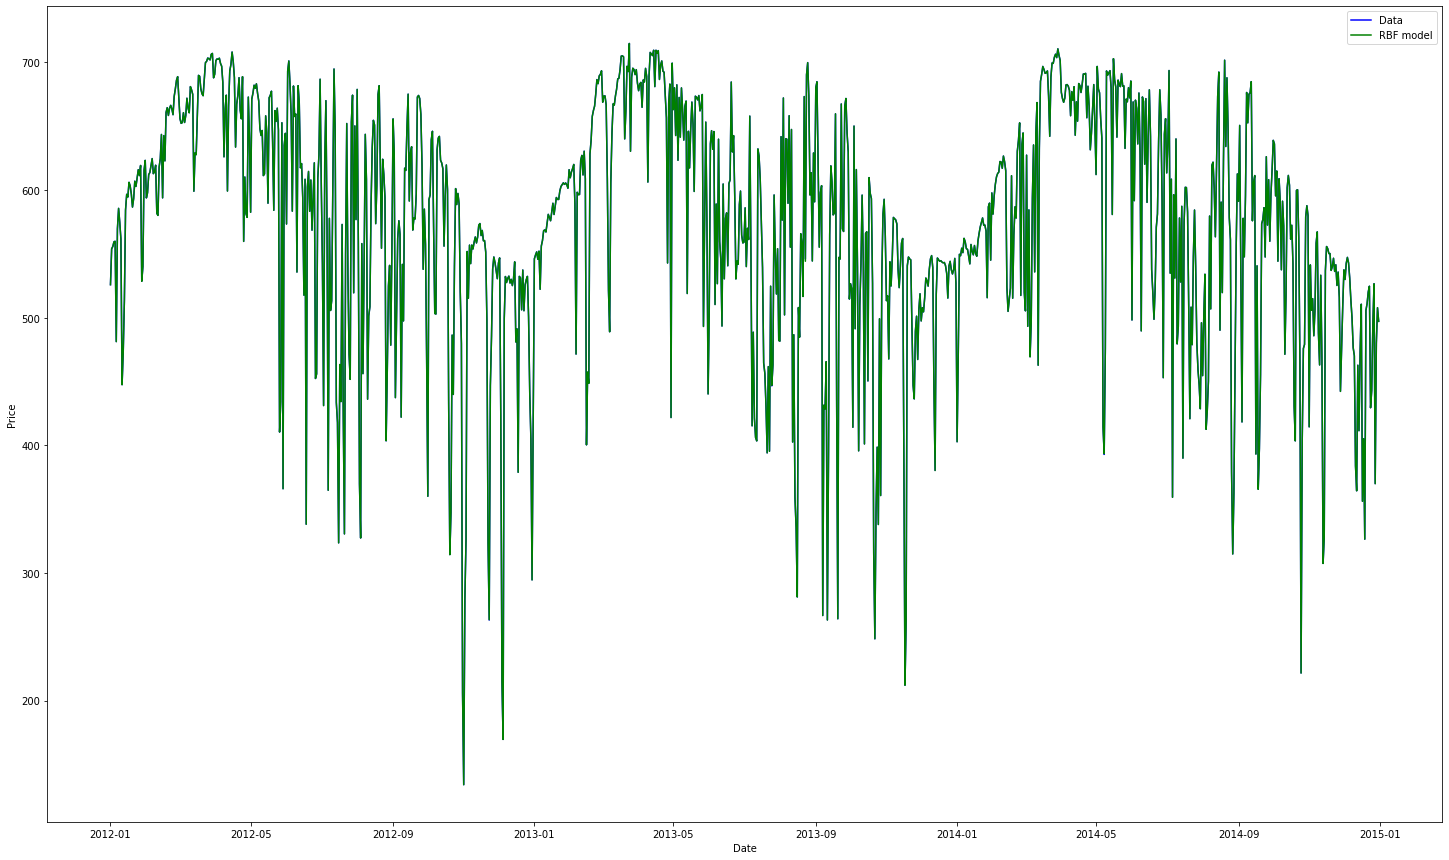

In [19]:
plt.figure(figsize = (25,15))
plt.plot(y[4380:].index, y[4380:], color= 'blue', label= 'Data')
plt.plot(y[4380:].index,np.asarray(yhat).reshape(1095,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
MLPdata = pd.DataFrame(columns=['Date','GHI'])
MLPdata['Date'] = y[4380:].index
MLPdata['GHI'] = np.asarray(yhat).reshape(1095,)
MLPdata.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/AndhraPradesh1/MLPdaily.csv')

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[4380:],np.asarray(yhat).reshape(1095,) ,squared=False)

0.07411160619590851

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y[4380:],np.asarray(yhat).reshape(1095,))

5.429465024045446e-05